# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined=pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_mice = combined["Mouse ID"].nunique()
number_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = combined.loc[combined.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_ID_df = combined.loc[combined["Mouse ID"]== "g989", :]
duplicate_mice_ID_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined[combined['Mouse ID'].isin(duplicate_mice_ID)== False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
number_mice_clean = clean_df["Mouse ID"].nunique()
number_mice_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df["Drug Regimen"]).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df["Drug Regimen"]).median()
variance = clean_df['Tumor Volume (mm3)'].groupby(clean_df["Drug Regimen"]).var()
standard_deviation = clean_df['Tumor Volume (mm3)'].groupby(clean_df["Drug Regimen"]).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df["Drug Regimen"]).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics_df = pd.DataFrame ({"Mean Tumor Volume": mean,
                                       "Median Tumor Volume": median,
                                       "Tumor Volume Variance": variance,
                                       "Tumor Volume Std. Dev.": standard_deviation,
                                       "Tumor Volume STD. Err.": sem})

summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume STD. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of timepoints per treatment')

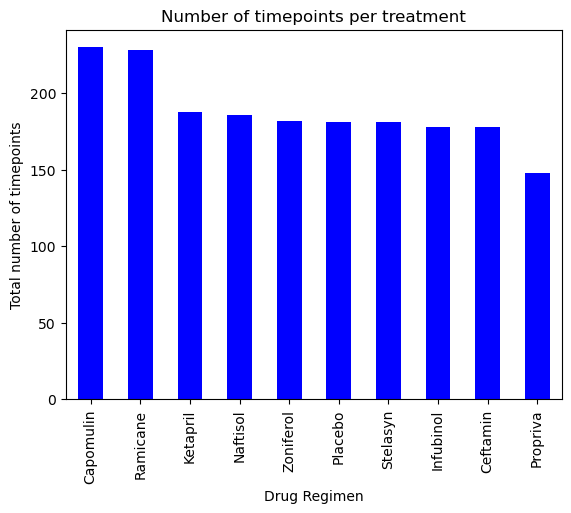

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mice_ID_count= clean_df["Drug Regimen"].value_counts()
mice_ID_count

pandas_plot = mice_ID_count.plot.bar(color='b')
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of timepoints")
plt.title("Number of timepoints per treatment")

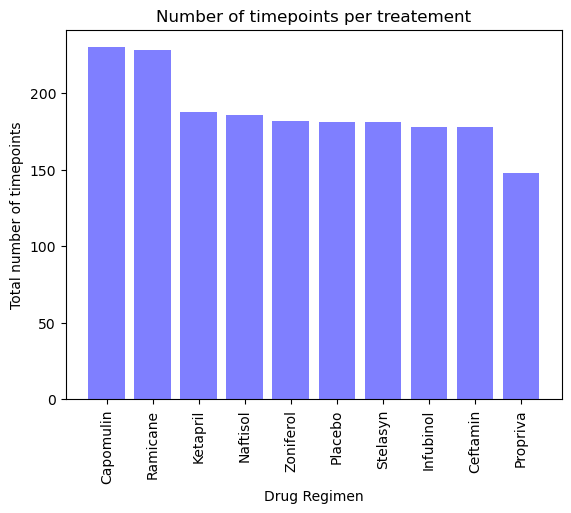

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_ID_count.index.values
y_axis = mice_ID_count.values

plt.bar(x_axis, y_axis, color="b", alpha=0.5, align="center")

plt.xlabel("Drug Regimen")
plt.ylabel("Total number of timepoints")
plt.title("Number of timepoints per treatement")
plt.xticks(rotation="vertical")

plt.show()

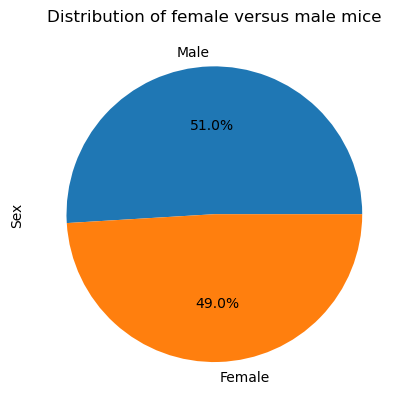

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_df["Sex"].value_counts()


gender.plot.pie(autopct="%1.1f%%")
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.show()

In [12]:
gender_data = clean_df["Sex"].value_counts()
gender_data

Sex
Male      958
Female    922
Name: count, dtype: int64

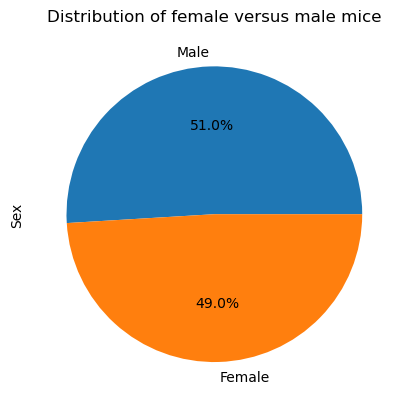

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Male", "Female"]
distribution = [50.957447, 49.042513]

plt.pie(distribution, labels=sex, autopct="%1.1f%%")
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatments = combined[combined["Drug Regimen"].isin(treatments_list)]
treatments.head()

last_timepoint = treatments.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
# Put treatments into a list for for loop (and later for plot labels)
for treatment in treatments_list:
    print(treatment)

Capomulin
Ramicane
Infubinol
Ceftamin


In [50]:



# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    
treatment = 0
for treatment in treatments_list:
    quartiles = last_timepoint.loc[treatment].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles.loc[0.25].round(2)
    upperq = quartiles.loc[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    
    if treatment == 0:
        print(f"------------------------------------------------------")
    print(f"The lower quartile of {treatment} is: {lowerq}")
    print(f"The upper quartile of  {treatment} is: {upperq}")
    print(f"The interquartile range of  {treatment} is: {iqr}")
    print(f"The the median of  {treatment} is: {quartiles.loc[0.5]} ")    
    
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")  
    print(f"------------------------------------------------------")
        
    


The lower quartile of Capomulin is: tumor_size    32.38
Name: 0.25, dtype: float64
The upper quartile of  Capomulin is: tumor_size    40.16
Name: 0.75, dtype: float64
The interquartile range of  Capomulin is: tumor_size    7.78
dtype: float64
The the median of  Capomulin is: tumor_size    38.13
Name: 0.5, dtype: float64 
Values below tumor_size    20.71
dtype: float64 could be outliers.
Values above tumor_size    51.83
dtype: float64 could be outliers.
------------------------------------------------------
The lower quartile of Ramicane is: tumor_size    31.56
Name: 0.25, dtype: float64
The upper quartile of  Ramicane is: tumor_size    40.66
Name: 0.75, dtype: float64
The interquartile range of  Ramicane is: tumor_size    9.1
dtype: float64
The the median of  Ramicane is: tumor_size    36.56
Name: 0.5, dtype: float64 
Values below tumor_size    17.91
dtype: float64 could be outliers.
Values above tumor_size    54.31
dtype: float64 could be outliers.
------------------------------------

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U10'), dtype('<U10')) -> None

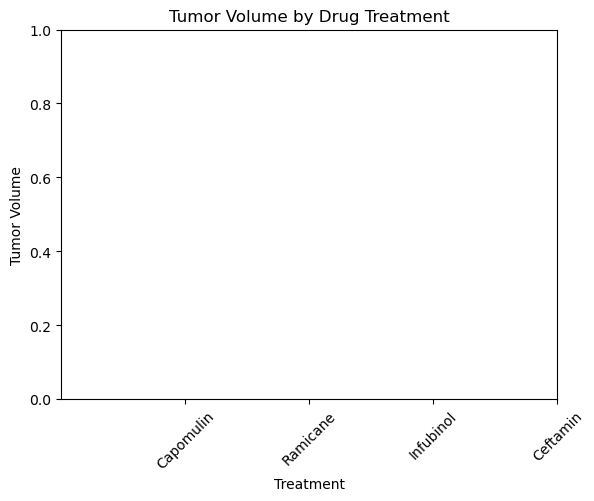

In [58]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_plot_list =[]
for treatment in treatments_list:
    box_plot_list.append(list(last_timepoint.loc[treatment].dropna()))
    
    
fig = plt.figure()
plt.title("Tumor Volume by Drug Treatment")
plt.xlabel("Treatment")
plt.ylabel("Tumor Volume")
plt.xticks([1,2,3,4], treatments_list, rotation=45)
plt.boxplot(box_plot_list)
plt.show()

## Line and Scatter Plots

In [63]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"]== "Capomulin",:]

line_df = capomulin_df.loc[capomulin_df["Mouse ID"]=="u364", :]

x_axis= line_df["Timepoint (Days)"]
tumorsize = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title("Tumor volume vs time point for a single mouse treated with Capomulin")
plt.plot(x_axis, tumorsize, linewidth =2, markersize=15, marker="o", colour="red", label="volume")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

KeyError: 'Timepoint (Days)'

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
